In [1]:
import pandas as pd
df=pd.read_csv('QueryResults.csv')

#### alternatively
1. new_df= pd.read_csv('QueryResults.csv',names=['date','tag','posts'],header=0)
2. new_df.head()

In [2]:
df.head(0)

,m,TagName,Unnamed: 2


In [3]:
df=df.rename(columns={'m':'date','TagName':'tag','Unnamed: 2':'posts'})
df.head(0)

,date,tag,posts


In [4]:
df.head()

,date,tag,posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
df.tail()

,date,tag,posts
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [6]:
(row,col)=df.shape
print(f'Total rows:{row} \nTotal cols: {col}')

Total rows:1991 
Total cols: 3


##### Count the number of entries in each column.

In [7]:
pd.DataFrame(df.count(),columns=['count'])

,count
date,1991
tag,1991
posts,1991


In [8]:
new_df= pd.read_csv('QueryResults.csv',names=['date','tag','posts'],header=0)
new_df.head()

,date,tag,posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


### to count the number of posts per language

In [9]:
df[['tag','posts']].groupby('tag').sum()

,posts
tag,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [10]:
df.drop(columns='date').groupby('tag').sum()

,posts
tag,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


### Which programming language had the most number of posts ?

In [11]:
df[['tag','posts']].groupby('tag').sum().sort_values('posts',ascending=False).head(1)

,posts
tag,
javascript,2056510


In [12]:
df.groupby('date').max()

,tag,posts
date,,
2008-07-01 00:00:00,c#,3
2008-08-01 00:00:00,ruby,511
2008-09-01 00:00:00,ruby,1649
2008-10-01 00:00:00,ruby,1989
2008-11-01 00:00:00,ruby,1730
...,...,...
2020-03-01 00:00:00,swift,26673
2020-04-01 00:00:00,swift,32605
2020-05-01 00:00:00,swift,34478


### Can you count how many months of posts exist for each programming language?

In [13]:
df.groupby('tag').count()

,date,posts
tag,,
assembly,144,144
c,144,144
c#,145,145
c++,144,144
delphi,144,144
go,129,129
java,144,144
javascript,144,144
perl,144,144


In [14]:
df.groupby('tag').count().sort_values('date',ascending=False)

,date,posts
tag,,
c#,145,145
assembly,144,144
c,144,144
c++,144,144
delphi,144,144
java,144,144
javascript,144,144
perl,144,144
php,144,144


### Selecting an Individual Cell

In [15]:
df['date'][1]

'2008-08-01 00:00:00'

In [16]:
df.date[1]

'2008-08-01 00:00:00'

In [17]:
type(df.date[1])

str

In [18]:
print(df.date[0])
print(pd.to_datetime(df.date[0]))
type(pd.to_datetime(df.date[0]))

2008-07-01 00:00:00
2008-07-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [19]:
# Convert Entire Column
df.date= pd.to_datetime(df.date)
df.head()

,date,tag,posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [20]:
df[['tag','posts']].groupby('tag').sum()

,posts
tag,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


## Pivoting DataFrame

In [21]:
df.head(0)

,date,tag,posts


In [22]:
reshaped_df= df.pivot(index='date',columns='tag',values='posts')
reshaped_df.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [23]:
reshaped_df.shape

(145, 14)

In [24]:
reshaped_df.tail()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2020-03-01,317.0,2670.0,8954.0,5107.0,181.0,719.0,13253.0,20483.0,215.0,6672.0,26673.0,5761.0,780.0,3434.0
2020-04-01,406.0,3472.0,10042.0,6820.0,250.0,887.0,15377.0,24634.0,240.0,8060.0,32605.0,7047.0,860.0,4015.0
2020-05-01,386.0,3602.0,9923.0,7063.0,221.0,826.0,14711.0,25196.0,228.0,7917.0,34478.0,6833.0,774.0,4066.0
2020-06-01,363.0,2757.0,9064.0,6161.0,214.0,765.0,13015.0,23360.0,203.0,7188.0,31817.0,6249.0,670.0,3733.0
2020-07-01,298.0,2294.0,9145.0,5756.0,212.0,743.0,12723.0,23802.0,182.0,7334.0,31261.0,5694.0,775.0,3607.0


In [25]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='tag')

In [26]:
# no of entries per column (unequal value causes by NaN(Not an Number))
reshaped_df.count()

tag
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

## Replacing NaN

In [27]:
reshaped_df.fillna(0,inplace=True)
reshaped_df.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [28]:
# is any NaN value present
reshaped_df.isna().values.any()

False

# Matplotlib

In [29]:
import matplotlib.pyplot as plt

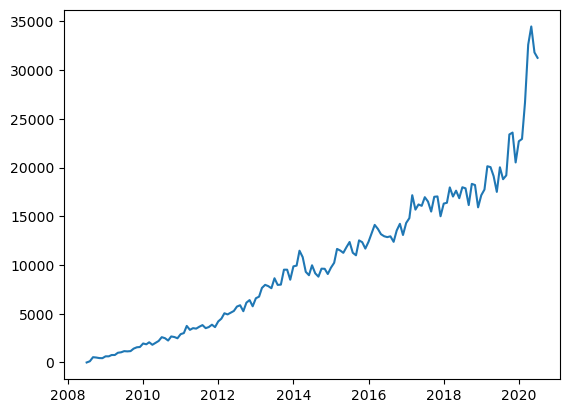

In [30]:
# x= date y= posts category= python
plt.plot(reshaped_df.index,reshaped_df.python)

In [31]:
reshaped_df.head()

tag,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
date,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


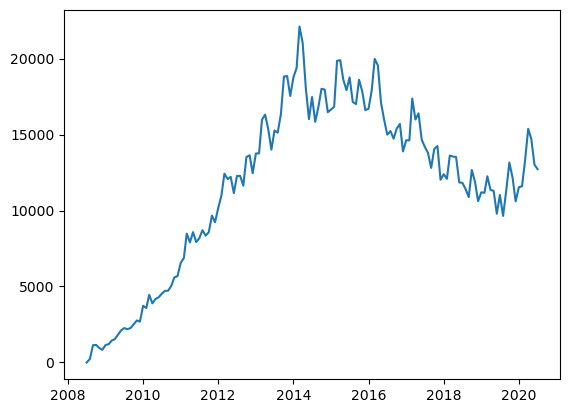

In [32]:
plt.plot(reshaped_df.index,reshaped_df['java'])

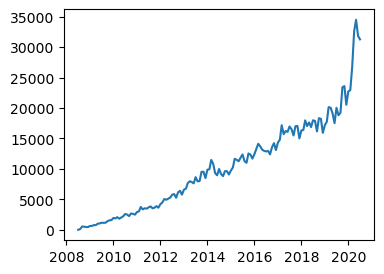

In [33]:
plt.figure(figsize=(4,3))
plt.plot(reshaped_df.index,reshaped_df.python)

# Multi-line charts

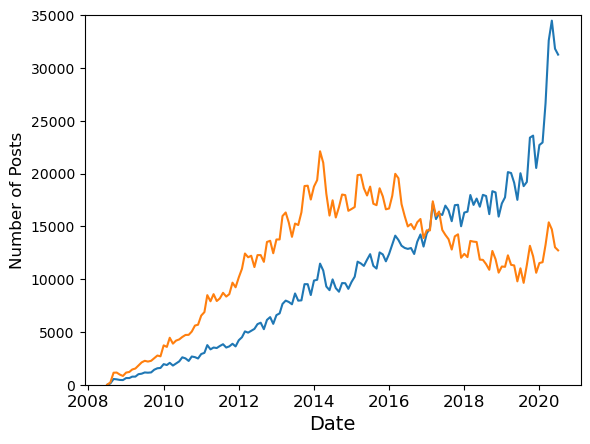

In [34]:
# plt.figure(figsize=(8,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts',fontsize=12)
plt.ylim(0,35000)
plt.plot(reshaped_df.index,reshaped_df.python)
plt.plot(reshaped_df.index,reshaped_df.java)

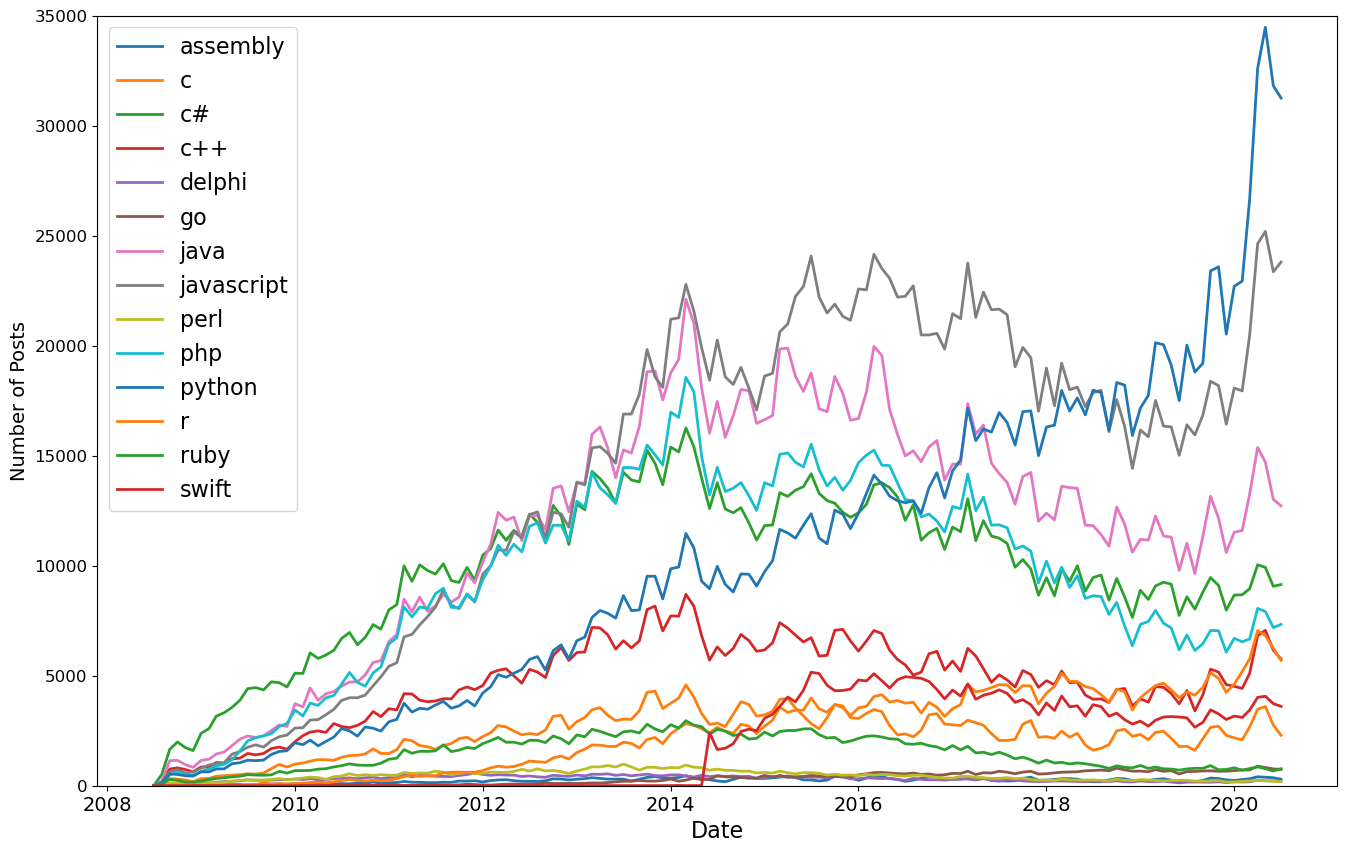

In [35]:
# plot all languages using loop add legend also
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of Posts',fontsize=14)
plt.ylim(0,35000)
for tag in reshaped_df.columns:
    plt.plot(reshaped_df.index,reshaped_df[tag],linewidth=2,label=tag)
plt.legend(fontsize=16)

# Smoothid out Time Series

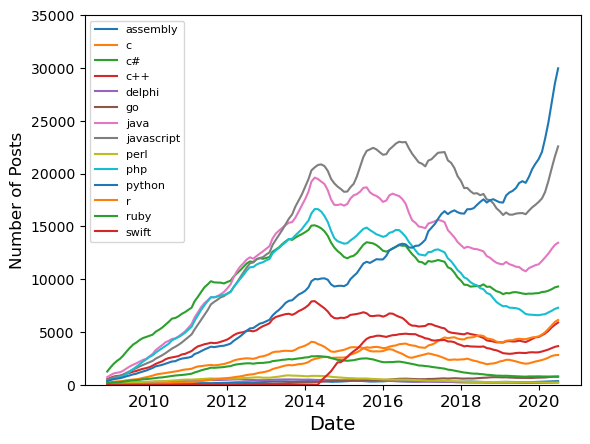

In [36]:
roll_df= reshaped_df.rolling(window=6).mean()
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Number of Posts',fontsize=12)
plt.ylim(0,35000)
for tag in roll_df.columns:
    plt.plot(roll_df.index,roll_df[tag],linewidth=1.5,label=tag)
plt.legend(fontsize=8)